# Enhanced Simulator for Animal Movements Using CARW

This enhanced simulator introduces a more sophisticated model for simulating animal movements within an environment, incorporating aspects of complex adaptive random walks (CARW). The simulation is designed to mimic the behavior of an animal as it navigates a 2D space filled with varying densities of resources. The model integrates concepts of environmental variability, energy consumption, adaptive step size, and memory of resource-rich locations, providing a more realistic approximation of how an animal might move and behave in a natural habitat. Below is an overview of the key components and functionalities of the simulator.


In [333]:
import numpy as np
import matplotlib.pyplot as plt

## Environment

The `Environment` class represents the 2D space in which the animal moves. It is characterized by a resource map, which is a 2D array indicating the density of resources at different locations. The resource map is initialized with a gradient pattern and several peaks, simulating areas of varying resource availability, from sparse to abundant. The class provides a method to retrieve the resource density at any given position, allowing the animal to make decisions based on local resource availability.


In [334]:
class Environment:
    def __init__(self, size=(100, 100)):
        self.size = size
        # Generate a resource density map
        self.resource_map = np.zeros(self.size)
        self.init_resource_map()

    def init_resource_map(self):
        """Initialize the resource map with a gradient and some peaks."""
        for x in range(self.size[0]):
            for y in range(self.size[1]):
                self.resource_map[x, y] = np.sin(x / 10) * np.cos(y / 10)
        # Add some high resource density areas
        for _ in range(5):
            peak_x, peak_y = np.random.randint(0, self.size[0], size=2)
            self.resource_map[peak_x-3:peak_x+3, peak_y-3:peak_y+3] += 5

    def get_resource_density(self, position):
        """Get the resource density at the given position."""
        x, y = np.clip(position, 0, np.array(self.size) - 1).astype(int)
        return self.resource_map[x, y]

## Animal

The `Animal` class models the behavior of an animal navigating through the environment. The animal has several attributes, including its current position, energy level, a path history recording its movements, and a memory of visited locations that were rich in resources. The key methods in this class are as follows:

- **step**: At each step, the animal decides its next move based on a combination of random exploration and adaptive behavior aimed at optimizing its energy efficiency and resource intake. The step size and direction are influenced by the local density of resources, with larger steps taken in areas of lower resource density to cover more ground. If the animal encounters a resource-rich area, it gains energy and memorizes the location for potential future visits. If the energy level falls below a certain threshold, the animal rests to recover energy instead of moving.
- **rest**: This method simulates the animal resting to recover energy. It is called when the animal's energy level is too low to continue moving.
- **simulate_movement**: This method initiates the simulation, causing the animal to take a series of steps determined by the simulation parameters (e.g., the number of steps).


In [335]:
class Animal:
    def __init__(self, environment, energy=100):
        self.environment = environment
        self.position = np.array([50, 50])
        self.energy = energy
        self.path = [self.position.copy()]
        self.memory = []

    def step(self):
        # Check energy level; if too low, rest
        if self.energy < 20:
            self.rest()
            return
        
        current_resource_density = self.environment.get_resource_density(self.position)
        
        # Adaptive step size based on resource density
        step_size = max(1, 10 - current_resource_density)

        # Random component
        angle = np.random.rand() * 2 * np.pi
        random_step = np.array([np.cos(angle), np.sin(angle)]) * step_size

        # Adaptive component: Move based on local resource density gradient and memory
        if current_resource_density < 1 and self.memory:
            # Move towards remembered high-resource area
            target_position = self.memory[np.random.randint(len(self.memory))]
        else:
            # Explore surrounding area
            gradient_x = np.random.uniform(-1, 1)
            gradient_y = np.random.uniform(-1, 1)
            adaptive_step = np.array([gradient_x, gradient_y]) * step_size
            target_position = self.position + random_step + adaptive_step

        # Update energy
        self.energy -= step_size * 0.1
        if current_resource_density > 2:
            self.energy += 2
            self.memory.append(self.position.copy())

        # Update position
        self.position = np.clip(target_position, 0, np.array(self.environment.size) - 1)
        self.path.append(self.position.copy())

    def rest(self):
        """Rest and recover energy."""
        self.energy += 10
        self.path.append(self.position.copy())

    def simulate_movement(self, num_steps=500):
        for _ in range(num_steps):
            self.step()

## Simulation and Visualization

After defining the environment and animal, the simulation is run for a specified number of steps. The animal's movement decisions are influenced by its strategy to balance energy expenditure with the need to find resources. The simulation results, including the path taken by the animal and the distribution of resources in the environment, are visualized using Matplotlib. The resource map is displayed as a background gradient, with the animal's path overlaid as a series of points, illustrating how it navigates through the environment in search of resources.


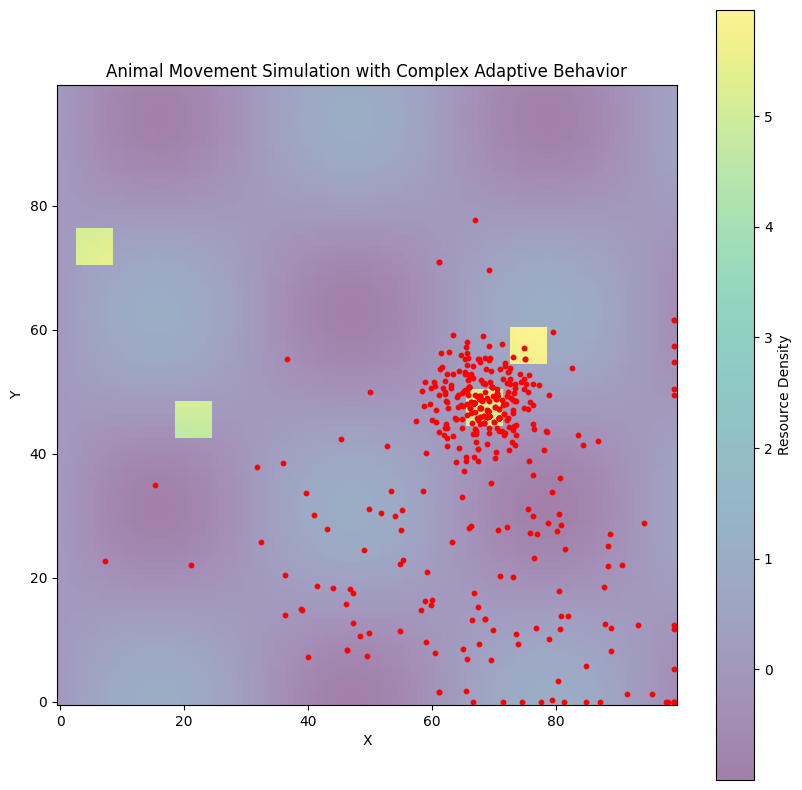

In [336]:
def plot_simulation(animal, environment):
    path = np.array(animal.path)
    plt.figure(figsize=(10, 10))
    plt.imshow(environment.resource_map.T, origin='lower', cmap='viridis', alpha=0.5)
    plt.colorbar(label='Resource Density')
    plt.scatter(path[:, 0], path[:, 1], c='red', s=10)
    plt.title('Animal Movement Simulation with Complex Adaptive Behavior')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


# Create environment and animal
env = Environment(size=(100, 100))
animal = Animal(env)

# Simulate animal movement
animal.simulate_movement()

# Plot the simulation results
plot_simulation(animal, env)